In [277]:
import pandas as pd
import numpy as np
import re

In [278]:
file = open('_chat.txt', 'r')

In [279]:
data = file.read()

In [280]:
# Create two columns data and message
pattern = '\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}:\d{1,2}\s[ap]\.m\.\]\s'
messages = re.split(pattern,data)[1:]

In [281]:
from datetime import datetime
dates = re.findall(pattern, data)
new_dates  = []
for date in dates:
    new_date = date.replace('\u202f', ' ').strip('[] ')
    new_dates.append(new_date)
    

In [282]:
df = pd.DataFrame({'user_message': messages, 'message_date': new_dates})

In [283]:
df.head()

,user_message,message_date
0,The Boys: ‎Messages and calls are end-to-end e...,"09/02/2023, 7:23:34 p.m."
1,Aadi Ucc: ‎Aadi Ucc created this group\n,"09/02/2023, 7:23:34 p.m."
2,The Boys: ‎Aadi Ucc added you\n,"09/02/2023, 7:23:35 p.m."
3,"Aadi Ucc: Bhaio, Saturday 11:00-15:00 2.6 room...","09/02/2023, 7:25:13 p.m."
4,Aadi Ucc: Monday 10:00-12:00 next session\n,"09/02/2023, 7:25:54 p.m."


In [284]:
df['message_date'] = df['message_date'].str.replace('a.m.', 'AM', case=False)
df['message_date'] = df['message_date'].str.replace('p.m.', 'PM', case=False)

In [285]:
df.head()

,user_message,message_date
0,The Boys: ‎Messages and calls are end-to-end e...,"09/02/2023, 7:23:34 PM"
1,Aadi Ucc: ‎Aadi Ucc created this group\n,"09/02/2023, 7:23:34 PM"
2,The Boys: ‎Aadi Ucc added you\n,"09/02/2023, 7:23:35 PM"
3,"Aadi Ucc: Bhaio, Saturday 11:00-15:00 2.6 room...","09/02/2023, 7:25:13 PM"
4,Aadi Ucc: Monday 10:00-12:00 next session\n,"09/02/2023, 7:25:54 PM"


In [286]:
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M:%S %p')

df.rename(columns={'message_date': 'date'}, inplace=True)

In [287]:
df.head()

,user_message,date
0,The Boys: ‎Messages and calls are end-to-end e...,2023-02-09 19:23:34
1,Aadi Ucc: ‎Aadi Ucc created this group\n,2023-02-09 19:23:34
2,The Boys: ‎Aadi Ucc added you\n,2023-02-09 19:23:35
3,"Aadi Ucc: Bhaio, Saturday 11:00-15:00 2.6 room...",2023-02-09 19:25:13
4,Aadi Ucc: Monday 10:00-12:00 next session\n,2023-02-09 19:25:54


In [288]:
df.shape

(8889, 2)

In [289]:
df['user_message']

0       The Boys: ‎Messages and calls are end-to-end e...
1                Aadi Ucc: ‎Aadi Ucc created this group\n
2                         The Boys: ‎Aadi Ucc added you\n
3       Aadi Ucc: Bhaio, Saturday 11:00-15:00 2.6 room...
4             Aadi Ucc: Monday 10:00-12:00 next session\n
                              ...                        
8884    Varun Ucc Ireland: Kre booking @353892326628 @...
8885                                        Aadi Ucc: 🫡\n
8886                                Barkha Ireland: Ji\n‎
8887                        Ria Walia: ‎sticker omitted\n
8888                                          Arjit: ok\n
Name: user_message, Length: 8889, dtype: object

In [290]:
users = []
message = []
for messages in df['user_message']:
    pattern = '([\w\W]+?):\s'
    entry = re.split(pattern, messages)
    users.append(entry[1])
    message.append(entry[2])
        

df['user'] = users
df['message'] = message
new_message = []
for m in df['message']:
    new_message.append(m.replace('\u200E', ''))

df['message'] = new_message
df['user'] = df['user'].replace({'The Boys':'Group notification'})
df.drop(columns=['user_message'], inplace=True)

In [291]:
df[df['message'] == 'image omitted\n'].shape[0]

194

In [292]:
df.head()

,date,user,message
0,2023-02-09 19:23:34,Group notification,Messages and calls are end-to-end encrypted. N...
1,2023-02-09 19:23:34,Aadi Ucc,Aadi Ucc created this group\n
2,2023-02-09 19:23:35,Group notification,Aadi Ucc added you\n
3,2023-02-09 19:25:13,Aadi Ucc,"Bhaio, Saturday 11:00-15:00 2.6 room book ki h..."
4,2023-02-09 19:25:54,Aadi Ucc,Monday 10:00-12:00 next session\n


### Splitting the date, month and year in date column

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8889 non-null   datetime64[ns]
 1   user     8889 non-null   object        
 2   message  8889 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 208.5+ KB


In [294]:
df['year'] = df['date'].dt.year

In [295]:
df['month'] = df['date'].dt.month_name()

In [296]:
df['day'] = df['date'].dt.day

In [297]:
df['hour'] = df['date'].dt.hour

In [298]:
df['minute'] = df['date'].dt.minute

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8889 non-null   datetime64[ns]
 1   user     8889 non-null   object        
 2   message  8889 non-null   object        
 3   year     8889 non-null   int64         
 4   month    8889 non-null   object        
 5   day      8889 non-null   int64         
 6   hour     8889 non-null   int64         
 7   minute   8889 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 555.7+ KB


In [300]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-02-09 19:23:34,Group notification,Messages and calls are end-to-end encrypted. N...,2023,February,9,19,23
1,2023-02-09 19:23:34,Aadi Ucc,Aadi Ucc created this group\n,2023,February,9,19,23
2,2023-02-09 19:23:35,Group notification,Aadi Ucc added you\n,2023,February,9,19,23
3,2023-02-09 19:25:13,Aadi Ucc,"Bhaio, Saturday 11:00-15:00 2.6 room book ki h...",2023,February,9,19,25
4,2023-02-09 19:25:54,Aadi Ucc,Monday 10:00-12:00 next session\n,2023,February,9,19,25


In [301]:
words = []
for message in df['message']:
    words.extend(message.split(' '))
len(words)

38171

In [302]:
df['message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
       'Aadi Ucc created this group\n', 'Aadi Ucc added you\n', ...,
       '@919988316292 @353830254207 @353894932454 @353892326628  booking sham ko krte hai fir <This message was edited>\n',
       'Theek hai varun\n',
       'Kre booking @353892326628 @919988316292 @919810836613 @353894932454\n'],
      dtype=object)

In [303]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls('My name is ajit and i have gmail.com https://facebook.com twitter')

In [304]:
y = []
for m in df['message']:
    urls = extractor.find_urls(m)
    y.extend(urls)

In [305]:
len(y)

79

In [306]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-02-09 19:23:34,Group notification,Messages and calls are end-to-end encrypted. N...,2023,February,9,19,23
1,2023-02-09 19:23:34,Aadi Ucc,Aadi Ucc created this group\n,2023,February,9,19,23
2,2023-02-09 19:23:35,Group notification,Aadi Ucc added you\n,2023,February,9,19,23
3,2023-02-09 19:25:13,Aadi Ucc,"Bhaio, Saturday 11:00-15:00 2.6 room book ki h...",2023,February,9,19,25
4,2023-02-09 19:25:54,Aadi Ucc,Monday 10:00-12:00 next session\n,2023,February,9,19,25


In [344]:
x = df['user'].value_counts().head()

In [345]:
x

Arjit                1952
Varun Ucc Ireland    1755
Aadi Ucc             1581
Ria Walia            1384
Barkha Ireland       1213
Name: user, dtype: int64

In [308]:
import matplotlib.pyplot as plt

In [309]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

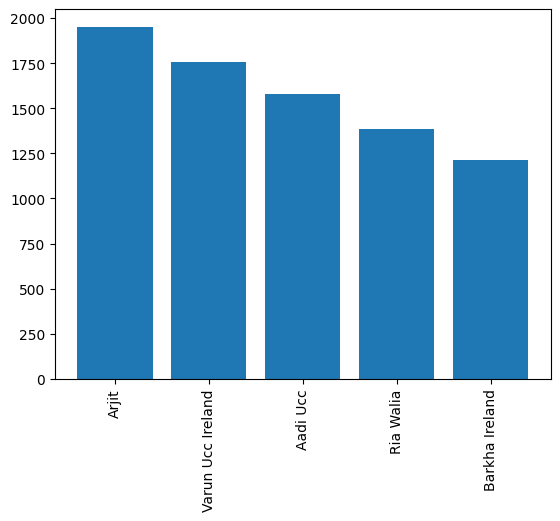

In [310]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')

In [311]:
new_df  = round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index()


In [312]:
new_df  =new_df.rename(columns={'index': "name", 'user': 'Percentage'})

In [313]:
new_df

,name,Percentage
0,Arjit,21.96
1,Varun Ucc Ireland,19.74
2,Aadi Ucc,17.79
3,Ria Walia,15.57
4,Barkha Ireland,13.65
5,Yash Data Science Ucc,5.68
6,Shashank Vats Ucc,4.47
7,Barkha UCC,1.12
8,Group notification,0.02


In [242]:
# check the top 25 words used in the group chat
words = []

for message in df['message']:
    words.extend(message.split())

In [244]:
counter = {}
for w in words:
    if w in counter:
        counter[w] += 1
    else:
        counter[w] = 1


In [249]:
final_list  = sorted(counter.items(), key=lambda x:x[1], reverse=True)

In [256]:
top_25_words_df  = pd.DataFrame(final_list[:25])
top_25_words_df.rename(columns={0:'Word',1:'Count'})


,Word,Count
0,hai,1367
1,omitted,908
2,sticker,616
3,to,493
4,?,316
5,bhi,289
6,hi,283
7,ki,259
8,nhi,253
9,ko,249


In [314]:
# remove group notifications
# remove media omitted or stikcer omitted messages
# remove stop words

temp_df  = df[df['user'] != 'Group notification']
temp_df = temp_df[temp_df['message'] != 'image omitted\n']
temp_df = temp_df[temp_df['message'] != 'sticker omitted\n']

In [315]:
temp_df

,date,user,message,year,month,day,hour,minute
1,2023-02-09 19:23:34,Aadi Ucc,Aadi Ucc created this group\n,2023,February,9,19,23
3,2023-02-09 19:25:13,Aadi Ucc,"Bhaio, Saturday 11:00-15:00 2.6 room book ki h...",2023,February,9,19,25
4,2023-02-09 19:25:54,Aadi Ucc,Monday 10:00-12:00 next session\n,2023,February,9,19,25
5,2023-02-09 19:32:02,Varun Ucc Ireland,Arjit ki shift hai shayad 😂\n,2023,February,9,19,32
6,2023-02-09 19:33:05,Aadi Ucc,"*Disclaimer, change in plans subject to availa...",2023,February,9,19,33
...,...,...,...,...,...,...,...,...
8883,2024-12-10 12:56:36,Yash Data Science Ucc,Indeed\n,2024,December,10,12,56
8884,2024-12-10 20:23:42,Varun Ucc Ireland,Kre booking @353892326628 @919988316292 @91981...,2024,December,10,20,23
8885,2024-12-10 20:24:39,Aadi Ucc,🫡\n,2024,December,10,20,24
8886,2024-12-10 20:25:11,Barkha Ireland,Ji\n,2024,December,10,20,25


In [316]:
f = open('stop_hinglish.txt')
stop_words  = f.read()

In [317]:
words = []

for message in temp_df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [ ]:
counter = {}
for w in words:
    if w in counter:
        counter[w] += 1
    else:
        counter[w] = 1

final_list  = sorted(counter.items(), key=lambda x:x[1], reverse=True)
top_25_words_df  = pd.DataFrame(final_list[:25])
top_25_words_df.rename(columns={0:'Word',1:'Count'})

,Word,Count
0,😂,244
1,hai?,100
2,omitted,98
3,yaar,97
4,baje,93
5,😂😂,89
6,jana,89
7,@353892326628,87
8,@353899764919,81
9,ria,79


In [322]:
import emoji
emojis = []

for m in df['message']:
    emojis.extend([c for c in m if emoji.is_emoji(c)])

In [324]:
from collections import Counter
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,857
1,🤣,277
2,😅,70
3,🏻,49
4,😆,47
...,...,...
128,🤬,1
129,🥶,1
130,🎲,1
131,🏡,1


In [325]:
df['month_num'] = df['date'].dt.month

In [326]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num
0,2023-02-09 19:23:34,Group notification,Messages and calls are end-to-end encrypted. N...,2023,February,9,19,23,2
1,2023-02-09 19:23:34,Aadi Ucc,Aadi Ucc created this group\n,2023,February,9,19,23,2
2,2023-02-09 19:23:35,Group notification,Aadi Ucc added you\n,2023,February,9,19,23,2
3,2023-02-09 19:25:13,Aadi Ucc,"Bhaio, Saturday 11:00-15:00 2.6 room book ki h...",2023,February,9,19,25,2
4,2023-02-09 19:25:54,Aadi Ucc,Monday 10:00-12:00 next session\n,2023,February,9,19,25,2


In [ ]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

21

In [334]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ "-" +str(timeline['year'][i]))

In [337]:
timeline['time'] = time

In [340]:
timeline

,year,month_num,month,message,time
0,2023,2,February,122,February-2023
1,2023,3,March,308,March-2023
2,2023,4,April,469,April-2023
3,2023,5,May,530,May-2023
4,2023,6,June,494,June-2023
5,2023,9,September,116,September-2023
6,2023,10,October,55,October-2023
7,2023,11,November,1417,November-2023
8,2023,12,December,770,December-2023
9,2024,1,January,270,January-2024


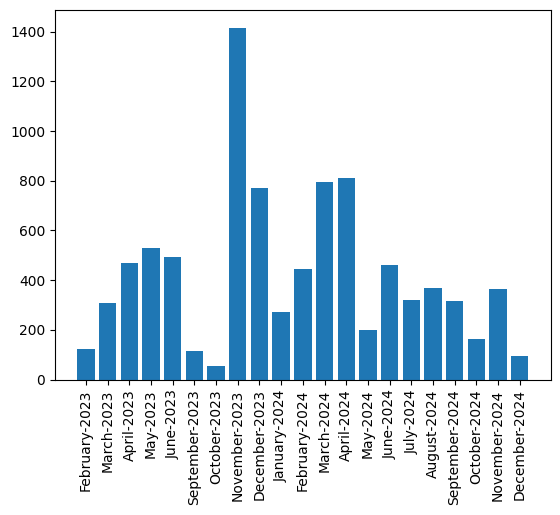

In [342]:
plt.bar(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()


In [348]:
df['day_name'] = df['date'].dt.day_name()

In [349]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,day_name
0,2023-02-09 19:23:34,Group notification,Messages and calls are end-to-end encrypted. N...,2023,February,9,19,23,2,Thursday
1,2023-02-09 19:23:34,Aadi Ucc,Aadi Ucc created this group\n,2023,February,9,19,23,2,Thursday
2,2023-02-09 19:23:35,Group notification,Aadi Ucc added you\n,2023,February,9,19,23,2,Thursday
3,2023-02-09 19:25:13,Aadi Ucc,"Bhaio, Saturday 11:00-15:00 2.6 room book ki h...",2023,February,9,19,25,2,Thursday
4,2023-02-09 19:25:54,Aadi Ucc,Monday 10:00-12:00 next session\n,2023,February,9,19,25,2,Thursday


In [350]:
df['day_name'].value_counts()

Friday       1585
Saturday     1405
Monday       1336
Sunday       1304
Thursday     1246
Tuesday      1131
Wednesday     882
Name: day_name, dtype: int64